<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


データセットから重要なデータを抽出して表示することは、データ サイエンスの必須部分です。これにより、個人はデータに基づいて正しい決定を下すことができます。この課題では、株価データを抽出し、そのデータをグラフに表示します。



<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***: anaconda を使用してローカルで作業している場合は、次のコードのコメントを解除して実行してください。Python のバージョンに応じてバージョンを使用してください。


In [2]:
!pip install yfinance
!pip install bs4
!pip install nbformat

In [3]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

Python では、 warnings モジュールを使用して警告を無視できます。 filterwarnings 関数を使用して、特定の警告メッセージまたはカテゴリをフィルタリングまたは無視できます。



In [4]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function



このセクションでは、関数を定義しますmake_graph。関数がどのように機能するかを知る必要はなく、入力だけに注意する必要があります。この関数は、株価データを含むデータフレーム (データフレームには Date 列と Close 列が含まれている必要があります)、収益データを含むデータフレーム (データフレームには Date 列と Revenue 列が含まれている必要があります)、および株の名前を受け取ります。


In [5]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

すでに定義した make_graph 関数を使用します。グラフを表示してダッシュボードを作成するには、質問 5 と 6 でこの関数を呼び出す必要があります。

注: このノートブックの他の場所でグラフをプロットするための関数を再定義する必要はありません。既存の関数を使用するだけです。


## Question 1: Use yfinance to Extract Stock Data



関数を使用して、Tickerデータを抽出する株式のティッカー シンボルを入力し、ティッカー オブジェクトを作成します。株式は Tesla で、ティッカー シンボルは TSLAです。


In [6]:
tesla = yf.Ticker("TSLA")

ティッカー オブジェクトと関数を使用してhistory株価情報を抽出し、 という名前のデータフレームに保存しますtesla_data。periodパラメータを に設定して"max"、最大期間の情報を取得します。


In [8]:
tesla_data = tesla.history(period="max")

tesla_data DataFrame のreset_index(inplace=True)関数を使用してインデックスをリセットしtesla_dataデータフレームの最初の 5 行を表示します(head)。質問 1 の最初から以下の結果までの結果とコードのスクリーンショットを撮ります。


In [9]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2: Use Webscraping to Extract Tesla Revenue Data


requestsライブラリーを使用して、Web ページhttps://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm をダウンロードし、応答のテキストをhtml_dataという名前の変数として保存します。


In [10]:
import requests
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text

Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [13]:
!pip install beautifulsoup4

soup = BeautifulSoup(html_data, 'html5lib')#BeautifulSoup(対象のHTML, "利用するパーサー")
# or
# soup = BeautifulSoup(html_data, 'html.parser')

Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Step-by-step instructions</summary>

```

Here are the step-by-step instructions:

1. Create an Empty DataFrame
2. Find the Relevant Table
3. Check for the Tesla Quarterly Revenue (四半期収入)Table
4. Iterate Through Rows in the Table Body
5. Extract Data from Columns
6. Append Data to the DataFrame

```
</details>


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
```

</details>


In [32]:
tesla_revenue = pd.DataFrame(columns=['Date','Revenue'])

#soup.find_all(要素)
table = soup.find_all("table")
table

[<table class="historical_data_table table">
 				<thead>
 				  <tr>
 					<th colspan="2" style="text-align:center">Tesla Annual Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>
 				  </tr>
 				</thead>					
 				<tbody>
 								
 												
 				<tr>
 					<td style="text-align:center">2021</td>
 				
 				
 				
 										<td style="text-align:center">$53,823</td>
 				
 								
 				</tr>
 				  
 												
 				<tr>
 					<td style="text-align:center">2020</td>
 				
 				
 				
 										<td style="text-align:center">$31,536</td>
 				
 								
 				</tr>
 				  
 												
 				<tr>
 					<td style="text-align:center">2019</td>
 				
 				
 				
 										<td style="text-align:center">$24,578</td>
 				
 								
 				</tr>
 				  
 												
 				<tr>
 					<td style="text-align:center">2018</td>
 				
 				
 				
 										<td style="text-align:center">$21,461</td>
 				
 								
 				</tr>
 				  
 												
 				<tr>
 					<td

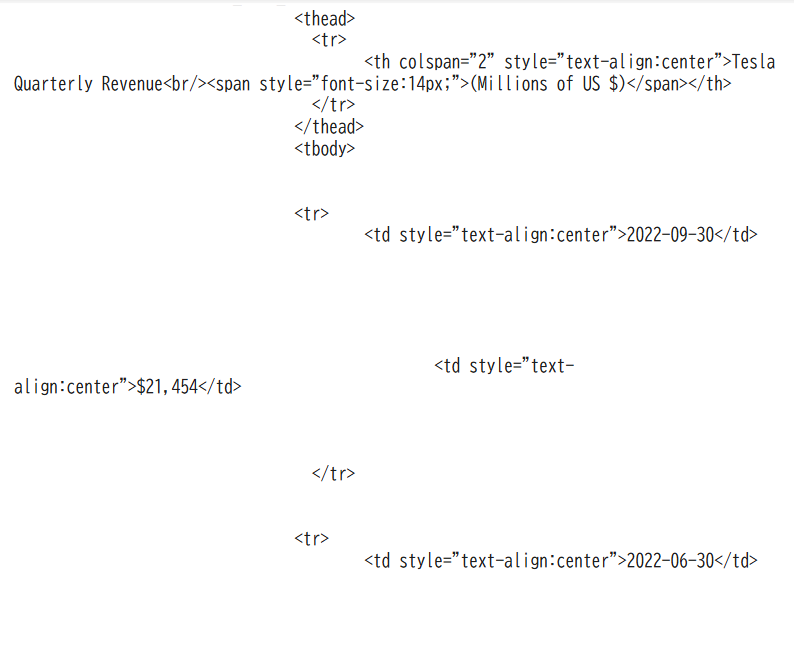

In [35]:
#文字列.startwith(指定した文字列)
for table in soup.find_all('table'):
   if table.find('th').getText().startswith("Tesla Quarterly Revenue"):
    for row in table.find("tbody").find_all("tr"):
       col = row.find_all("td")
       if len(col)!=2:
         continue
       Date = col[0].text
       Revenue = col[1].text
       temp_df = pd.DataFrame({"Date": [Date], "Revenue": [Revenue]})
       # Use concat to append the temporary DataFrame to tesla_revenue
       tesla_revenue = pd.concat([tesla_revenue, temp_df], ignore_index=True)

tesla_revenue

,Date,Revenue
0,2022-09-30,"$21,454"
1,2022-06-30,"$16,934"
2,2022-03-31,"$18,756"
3,2021-12-31,"$17,719"
4,2021-09-30,"$13,757"
5,2021-06-30,"$11,958"
6,2021-03-31,"$10,389"
7,2020-12-31,"$10,744"
8,2020-09-30,"$8,771"
9,2020-06-30,"$6,036"


Execute the following line to remove the comma and dollar sign from the `Revenue` column.


In [38]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace('$',"")
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',',"")
#ドル記号とカンマを削除
tesla_revenue

,Date,Revenue
0,2022-09-30,21454
1,2022-06-30,16934
2,2022-03-31,18756
3,2021-12-31,17719
4,2021-09-30,13757
5,2021-06-30,11958
6,2021-03-31,10389
7,2020-12-31,10744
8,2020-09-30,8771
9,2020-06-30,6036


Execute the following lines to remove an null or empty strings in the Revenue column.


In [40]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
tesla_revenue

<ipython-input-40-b9299b82bd12>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesla_revenue.dropna(inplace=True)


,Date,Revenue
0,2022-09-30,21454
1,2022-06-30,16934
2,2022-03-31,18756
3,2021-12-31,17719
4,2021-09-30,13757
5,2021-06-30,11958
6,2021-03-31,10389
7,2020-12-31,10744
8,2020-09-30,8771
9,2020-06-30,6036


Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [42]:
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [43]:
gme=yf.Ticker("GME")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [44]:
gme_data=gme.history(period='max')

**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [45]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578048,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


In [46]:
import requests
url2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data_2 = requests.get(url2).text

Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [48]:
soup2 = BeautifulSoup(html_data_2, 'html5lib')

Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


> **Note: Use the method similar to what you did in question 2.**  


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [52]:
gme_revenue = pd.DataFrame(columns=['Date','Revenue'])

#soup.find_all(要素)
table2 = soup2.find_all("table")


for table2 in soup2.find_all('table'):
   if table2.find('th').getText().startswith("GameStop Quarterly Revenue"):
    for row in table2.find("tbody").find_all("tr"):
       col = row.find_all("td")
       if len(col)!=2:
         continue
       Date = col[0].text
       Revenue = col[1].text
       temp_df = pd.DataFrame({"Date": [Date], "Revenue": [Revenue]})
       # Use concat to append the temporary DataFrame to tesla_revenue
       gme_revenue = pd.concat([gme_revenue, temp_df], ignore_index=True)

gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace('$',"")
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',',"")
#ドル記号とカンマを削除

gme_revenue

,Date,Revenue
0,2020-04-30,1021
1,2020-01-31,2194
2,2019-10-31,1439
3,2019-07-31,1286
4,2019-04-30,1548
...,...,...
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [53]:
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

```
    
</details>


In [57]:
#make_graph(stock_data, revenue_data, stock)
make_graph(tesla_data, tesla_revenue, "tesla")

<ipython-input-5-fa843a421e2e>:5: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

<ipython-input-5-fa843a421e2e>:6: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`

```
    
</details>


In [58]:
make_graph(gme_data, gme_revenue, 'GameStop')

<ipython-input-5-fa843a421e2e>:5: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

<ipython-input-5-fa843a421e2e>:6: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



<h2>About the Authors:</h2>

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/Images/SN_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


<h1>Extracting Stock Data Using a Python Library</h1>


会社の株式は、より正確には会社の一部である：

株式（エクイティとも呼ばれる）は、企業の一部分の所有権を表す証券である。株式（資本とも呼ばれる）は、企業の一部分の所有権を表す有価証券であり、株式の所有者は、所有する株式の数に等しい割合で、企業の資産と利益を得る権利を有する。株式の単位は「株」と呼ばれる。[1]

投資家は株式を購入し、後で売却することができる。株価が上がれば投資家は利益を得、下がれば損失を被る。株価の決定は複雑で、発行済み株式数、会社の将来の利益の大きさ、その他多くの要因によって決まる。人々は一日中株取引をしています。ティッカーとは、特定の銘柄の株価を示すレポートで、さまざまな証券取引所が取引セッション中、継続的に更新しています。

あなたはヘッジファンドで働くデータ・サイエンティストです。不審な株の動きを判断するのがあなたの仕事です。このラボでは、Pythonライブラリを使って株式データを抽出します。yfinance ライブラリを使用し、pandas データフレーム内のデータを返す銘柄のデータを抽出します。このラボでは、以下のデータを抽出します。

DeepL.com（無料版）で翻訳しました。


<h2>目次</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>yfinanceを使って株価情報を抽出する</li>
        <li>yfinanceを使って過去の株価データを抽出する</li>
        <li>yfinanceを使って過去の配当データを抽出する</li>
        <li>Exercise</li>
    </ul>
<p>
    所要時間の目安 : <strong>30 分</strong></p>
</div>

<hr>


In [ ]:
!pip install yfinance
!pip install matplotlib
# !pip install pandas==1.3.3

In [ ]:
import yfinance as yf
import pandas as pd

## Using the yfinance Library to Extract Stock Data


Ticker`モジュールを使って、データを抽出するための関数にアクセスできるオブジェクトを作成することができる。これを行うには、株式のティッカーシンボルを提供する必要がある。ここでは、会社はAppleで、ティッカーシンボルは `AAPL` である。


In [ ]:
apple = yf.Ticker("AAPL")

これで、関数や変数にアクセスして、必要なタイプのデータを取り出すことができる。https://aroussi.com/post/python-yahoo-finance。


In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json

--2025-01-31 11:48:19--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5699 (5.6K) [application/json]
Saving to: ‘apple.json’

apple.json          100%[===================>]   5.57K  --.-KB/s    in 0s      

2025-01-31 11:48:20 (1.47 GB/s) - ‘apple.json’ saved [5699/5699]



### Stock Info


<code>info</code>属性を使って、銘柄に関する情報をPython辞書として取り出すことができます。


In [ ]:
import json
with open('apple.json') as json_file:
    apple_info = json.load(json_file)
    # Print the type of data variable
    #print("Type:", type(apple_info))
apple_info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 100000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience wit

We can get the <code>'country'</code> using the key country


In [ ]:
apple_info['country']

'United States'

### Extracting Share Price


株は、あなたが買うことができる会社の株式の単一の最小部分であり、これらの株式の価格は時間の経過とともに変動する。<code>history()</code>メソッドを使うと、一定期間の株価を取得することができる。period` パラメータを使用すると、現在からどのくらい遡ってデータを取得するかを設定できます。period`のオプションは、1日(1d)、5d、1ヶ月(1mo)、3mo、6mo、1年(1y)、2y、5y、10y、ytd、maxです。


In [ ]:
apple_share_price_data = apple.history(period="max")

The format that the data is returned in is a Pandas DataFrame. With the `Date` as the index the share `Open`, `High`, `Low`, `Close`, `Volume`, and `Stock Splits` are given for each day.


In [ ]:
apple_share_price_data.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-01-24 00:00:00-05:00,224.779999,225.630005,221.410004,222.779999,54697900,0.0,0.0
2025-01-27 00:00:00-05:00,224.020004,232.149994,223.979996,229.860001,94863400,0.0,0.0
2025-01-28 00:00:00-05:00,230.850006,240.190002,230.809998,238.259995,75707600,0.0,0.0
2025-01-29 00:00:00-05:00,234.119995,239.860001,234.009995,239.360001,45375500,0.0,0.0
2025-01-30 00:00:00-05:00,238.664993,240.789993,237.210007,237.589996,44801575,0.0,0.0


In [ ]:
apple_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.098834,0.099264,0.098834,0.098834,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094108,0.094108,0.093678,0.093678,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087232,0.087232,0.086802,0.086802,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.088951,0.089381,0.088951,0.088951,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091530,0.091959,0.091530,0.091530,73449600,0.0,0.0


reset_index`関数でDataFrameのインデックスをリセットすることができる。また、`inplace` パラメータを `True` に設定することで、DataFrame 自体に変更を加えることができる。


In [ ]:
apple_share_price_data.reset_index(inplace=True)

 `Open` 価格を `Date`に対してプロットできる:


<Axes: xlabel='Date'>

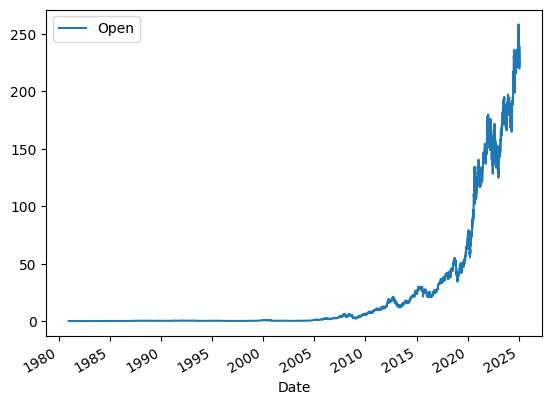

In [ ]:
apple_share_price_data.plot(x="Date", y="Open")

### Extracting Dividends


配当とは、企業の利益を株主に分配することである。この場合、投資家が所有する株1株あたりに還元される金額として定義される。変数 `dividends` を使って、データのデータフレームを得ることができる。データの期間は 'history` 関数で定義された期間で与えられる。


In [ ]:
apple.dividends

,Dividends
Date,
1987-05-11 00:00:00-04:00,0.000536
1987-08-10 00:00:00-04:00,0.000536
1987-11-17 00:00:00-05:00,0.000714
1988-02-12 00:00:00-05:00,0.000714
1988-05-16 00:00:00-04:00,0.000714
...,...
2023-11-10 00:00:00-05:00,0.240000
2024-02-09 00:00:00-05:00,0.240000
2024-05-10 00:00:00-04:00,0.250000


We can plot the dividends overtime:


<Axes: xlabel='Date'>

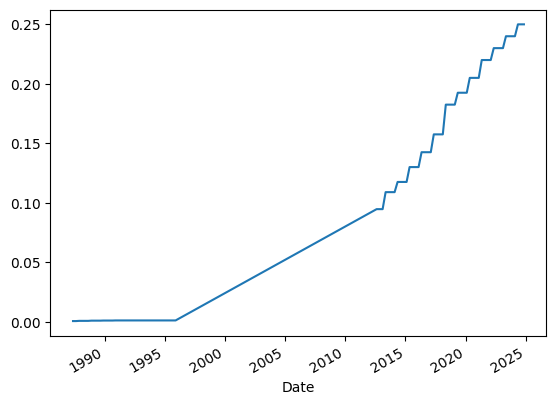

In [ ]:
apple.dividends.plot()

## Exercise


Ticker`モジュールを使って、AMD(Advanced Micro Devices)のティッカーシンボル`AMD`のオブジェクトを作成する。


In [ ]:
amd = yf.Ticker("AMD")

In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/amd.json

--2025-01-31 12:09:10--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/amd.json
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5838 (5.7K) [application/json]
Saving to: ‘amd.json.1’

amd.json.1          100%[===================>]   5.70K  --.-KB/s    in 0s      

2025-01-31 12:09:11 (1.25 GB/s) - ‘amd.json.1’ saved [5838/5838]



In [ ]:
import json
with open('amd.json') as json_file:
    amd_info = json.load(json_file)
    # Print the type of data variable
    #print("Type:", type(apple_info))
amd_info

{'zip': '95054',
 'sector': 'Technology',
 'fullTimeEmployees': 15500,
 'longBusinessSummary': 'Advanced Micro Devices, Inc. operates as a semiconductor company worldwide. The company operates in two segments, Computing and Graphics; and Enterprise, Embedded and Semi-Custom. Its products include x86 microprocessors as an accelerated processing unit, chipsets, discrete and integrated graphics processing units (GPUs), data center and professional GPUs, and development services; and server and embedded processors, and semi-custom System-on-Chip (SoC) products, development services, and technology for game consoles. The company provides processors for desktop and notebook personal computers under the AMD Ryzen, AMD Ryzen PRO, Ryzen Threadripper, Ryzen Threadripper PRO, AMD Athlon, AMD Athlon PRO, AMD FX, AMD A-Series, and AMD PRO A-Series processors brands; discrete GPUs for desktop and notebook PCs under the AMD Radeon graphics, AMD Embedded Radeon graphics brands; and professional graphi

<b>Question 1</b> Use the key  <code>'country'</code> to find the country the stock belongs to, remember it as it will be a quiz question.


In [ ]:
amd_info['country']

'United States'

<b>Question 2</b> Use the key  <code>'sector'</code> to find the sector the stock belongs to, remember it as it will be a quiz question.


In [ ]:
amd_share_price_data = amd.history(period="max")
amd_share_price_data.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-01-24 00:00:00-05:00,124.550003,125.250000,122.230003,122.839996,31570300,0.0,0.0
2025-01-27 00:00:00-05:00,117.800003,118.080002,112.800003,115.010002,61067900,0.0,0.0
2025-01-28 00:00:00-05:00,115.180000,116.150002,112.949997,114.169998,40554800,0.0,0.0
2025-01-29 00:00:00-05:00,115.769997,118.519997,114.959999,117.349998,40059000,0.0,0.0
2025-01-30 00:00:00-05:00,118.480003,120.440002,117.089996,118.860001,29345608,0.0,0.0


<b>Question 3</b> Obtain stock data for AMD using the `history` function, set the `period` to max. Find the `Volume` traded on the first day (first row).


<Axes: xlabel='Date'>

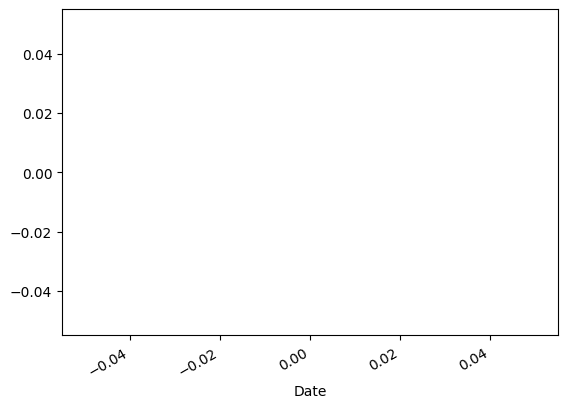

In [ ]:
amd.dividends.plot()

<h2>About the Authors:</h2>

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


<!-- ## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>-->

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
